In [1]:
import cv2
import matplotlib.pyplot as plt
import pickle
import numpy as np
%matplotlib inline

cam = cv2.VideoCapture(0) # grabs default camera
cv2.namedWindow('Testing')

img_counter = 0 #counts the number of images being captured when space button is hit

while True:
    success, frame = cam.read() #unpacks the tuple
    #frame gets the camera's input
    if not success:
        print('Failed to get an image')
        break
    cv2.imshow('Test', frame)

    k = cv2.waitKey(1)#if user has waited atleast 1ms(frame time) and pressed Esc key(=27), we can stop the infinite running code
    if k%256 == 27:  # ESC pressed
        print('Closing window...')
        break
    elif k%256 == 32:
        #key 32 is space, so hitting this saves the image
        img_name = 'opencv_test_{}.png'.format(img_counter) #file name of image to be saved in
        # image to be saved as this named file
        cv2.imwrite(img_name, frame) #save image (frame variable) to the img_name
        print('{} saved'.format(img_name)) #confirm if it is saved where it's supposed to be
        img_counter += 1 #increment counter of image every time user hits the SPACE key

cam.release()
cv2.destroyAllWindows()

opencv_test_0.png saved
opencv_test_1.png saved
opencv_test_2.png saved
Closing window...


Dimensions of image after converting to a NumPy array:  2
Size of image:  307200


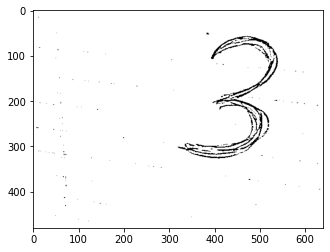

In [2]:
import numpy as np
img = cv2.imread('opencv_test_0.png', cv2.IMREAD_GRAYSCALE)
#read image in grayscale to apply thresholding
plt.imshow(img, cmap='gray')

img_array = np.array(img)
print('Dimensions of image after converting to a NumPy array: ', img_array.ndim) # 2
print('Size of image: ', img_array.size)

threshold = cv2.adaptiveThreshold(img, 255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,13,7)
new_image = threshold
plt.imshow(new_image, cmap='gray')


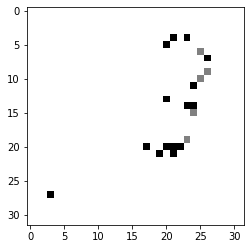

In [3]:
resized_img = cv2.resize(new_image, (32,32)) #resize gray scale image to 32x32 pixels
resized_img = resized_img.astype('float32')
 #reshaping to support our model input and normalizing
plt.imshow(resized_img, cmap='gray')

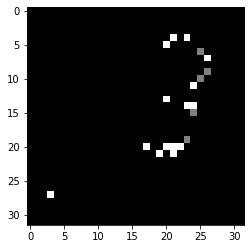

In [4]:
plt.imshow(255-resized_img, cmap='gray')

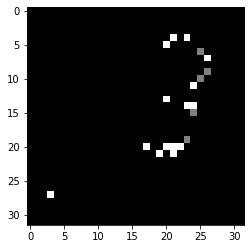

In [5]:
plt.imshow((255-resized_img)/255.0, cmap='gray')

In [6]:
#resized_img = 255-resized_img
#image inversion
#resized_img = resized_img / 255.0
resized_img = resized_img.reshape(1,32,32,1)
resized_img.shape

(1, 32, 32, 1)

In [7]:
#### LOAD THE TRAINED MODEL

pickle_in = open("A/model_trained.p","rb")
model = pickle.load(pickle_in)


Using TensorFlow backend.


In [8]:
'''while True:
    classIndex = int(model.predict_classes(resized_img))
    predictions = model.predict(resized_img)
    probVal = np.amax(predictions)
    print(classIndex, probVal)

    if probVal > 0.6:
        cv2.putText(frame, str(classIndex)+  '  ' + str(probVal), (50,50),cv2.FONT_HERSHEY_COMPLEX,
                    1,(0,0,255),1)
    
    cv2.imshow('Original Image ', frame)

    if cv2.waitKey(1) and 0xFF == ord('q'):
        break
cam.release()
cv2.destroyAllWindows()
#vs.stop()'''

"while True:\n    classIndex = int(model.predict_classes(resized_img))\n    predictions = model.predict(resized_img)\n    probVal = np.amax(predictions)\n    print(classIndex, probVal)\n\n    if probVal > 0.6:\n        cv2.putText(frame, str(classIndex)+  '  ' + str(probVal), (50,50),cv2.FONT_HERSHEY_COMPLEX,\n                    1,(0,0,255),1)\n    \n    cv2.imshow('Original Image ', frame)\n\n    if cv2.waitKey(1) and 0xFF == ord('q'):\n        break\ncam.release()\ncv2.destroyAllWindows()\n#vs.stop()"

In [9]:
resized_img

array([[[[255.],
         [255.],
         [255.],
         ...,
         [255.],
         [255.],
         [255.]],

        [[255.],
         [255.],
         [255.],
         ...,
         [255.],
         [255.],
         [255.]],

        [[255.],
         [255.],
         [255.],
         ...,
         [255.],
         [255.],
         [255.]],

        ...,

        [[255.],
         [255.],
         [255.],
         ...,
         [255.],
         [255.],
         [255.]],

        [[255.],
         [255.],
         [255.],
         ...,
         [255.],
         [255.],
         [255.]],

        [[255.],
         [255.],
         [255.],
         ...,
         [255.],
         [255.],
         [255.]]]], dtype=float32)

In [10]:
classIndex = int(model.predict_classes(resized_img))
predictions = model.predict(resized_img)
probVal = np.amax(predictions)
print(classIndex, probVal)

2 1.0


In [14]:
if probVal > 0.6:
        cv2.putText(new_image, str(classIndex+1)+  '  ' + str(probVal), (50,50),cv2.FONT_HERSHEY_COMPLEX,
                    1,(0,0,255),1)

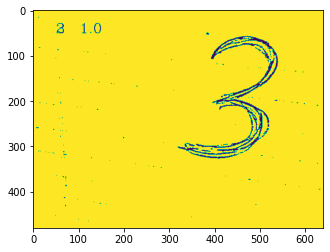

In [15]:
plt.imshow(new_image)